In [1]:
import wave
import struct
import sys
import csv
import numpy 
from scipy.io import wavfile
from scipy.signal import resample

In [3]:
fname = './audio/audio4.csv'
outfile = 'output.wav'

data = []

with open(fname, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter = ',')

    for row in spamreader:
        data.append(row[0])

# npdata = numpy.array(data)
print(data)

['time', "bytearray(b'\\x19')", 'bytearray(b"\\\'")', 'bytearray(b\'"\')', "bytearray(b'\\x1b')", "bytearray(b'j')", "bytearray(b'x')", "bytearray(b'\\xca')", "bytearray(b'\\xcc')", "bytearray(b'\\xd7')", "bytearray(b'\\xc5')", "bytearray(b'\\xc2')", "bytearray(b'\\xc4')", "bytearray(b'\\xe7')", "bytearray(b'\\xdd')", "bytearray(b'\\xe5')", "bytearray(b'\\x14')", "bytearray(b'\\x00')", "bytearray(b'\\x03')", "bytearray(b'\\xd9')", "bytearray(b'\\xde')", "bytearray(b'\\xf1')", "bytearray(b'\\x01')", "bytearray(b'\\x17')", "bytearray(b'\\xf3')", "bytearray(b'\\xa1')", "bytearray(b'\\xb2')", "bytearray(b'\\xc4')", "bytearray(b'R')", "bytearray(b'e')", "bytearray(b'\\x83')", "bytearray(b'\\xfe')", "bytearray(b'\\xf0')", "bytearray(b'\\xea')", "bytearray(b'\\xe9')", "bytearray(b'\\xea')", "bytearray(b'\\x01')", "bytearray(b'\\xa4')", "bytearray(b'\\xaf')", "bytearray(b'\\xc8')", "bytearray(b'\\xfa')", "bytearray(b'\\xf3')", "bytearray(b'\\xfb')", "bytearray(b'-')", "bytearray(b'=')", "bytea

In [10]:
print(data[1])
print(data[1][12:-2])

bytearray(b'\x19')
\x19


In [22]:
# strip byte format
# dum = [x[2:-1] for x in data[1:]] # for b'' format
dum = [x[12:-2] for x in data[1:]]
print(dum[0:20])
print(dum[1])

['\\x19', "\\'", '"', '\\x1b', 'j', 'x', '\\xca', '\\xcc', '\\xd7', '\\xc5', '\\xc2', '\\xc4', '\\xe7', '\\xdd', '\\xe5', '\\x14', '\\x00', '\\x03', '\\xd9', '\\xde']
\'


In [24]:
npdata = numpy.array(int.from_bytes(dum[1], byteorder="little", signed=True))
npdata


TypeError: cannot convert 'str' object to bytes

In [13]:
# 16khz sampling rate
#data is in int16
npdata = numpy.array(dum)
npdata = npdata.astype(numpy.int16)
print(type(npdata[0]))

ValueError: invalid literal for int() with base 10: '\\x19'

In [28]:
wavfile.write(outfile, 16000, npdata)

In [31]:
print("max: {}".format(max(npdata) ))
print("min: {}".format(min(npdata) ))
print("len: {}".format(len(npdata) ))

max: 62
min: -67
len: 15999


ValueError: too many values to unpack (expected 2)

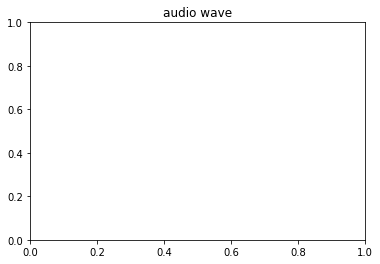

In [30]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title("audio wave")
y,x = enumerate(data[1:10])
plt.plot(x,y)
plt.show()

In [8]:
udata = npdata.astype(numpy.uint16)

In [10]:
udata

array([ 1266,   541, 12620, ...,  1086, 13456,   403], dtype=uint16)

In [9]:
newdata = udata.astype(numpy.int16)

In [69]:
newdata

array([ 1171,   256, 13288, ..., 13300,   426,  1157], dtype=int16)

In [11]:
def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val

In [18]:
twos_arr = []
for i in data:
    twos_arr.append(twos_comp((i,2),16))


TypeError: unsupported operand type(s) for &: 'tuple' and 'int'

In [ ]:
for i in twos_arr:
    print(i)